In [ ]:
import pandas as pd
import os
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


dataset_handle = "kalacheva/london-bike-share-usage-dataset"
path = kagglehub.dataset_download(dataset_handle)

print("Path:", path)

In [ ]:
files = os.listdir(path)
print(files)

In [6]:
# Create the full path to the specific file
csv_path = os.path.join(path, "LondonBikeJourneyAug2023.csv")

# Load the data
df_bikes = pd.read_csv(csv_path)

# Display the first 5 rows
df_bikes.head()

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,8/1/2023 0:00,983,"Euston Road, Euston",8/1/2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,8/1/2023 0:01,3479,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,8/1/2023 0:01,1219,"Lower Marsh, Waterloo",8/1/2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786


In [9]:
# date transformation

# Convert 'Start date' to datetime format
df_bikes['Start date'] = pd.to_datetime(df_bikes['Start date'])

# Extract 'Hour' and 'Day of Week' into new columns
df_bikes['Hour'] = df_bikes['Start date'].dt.hour
df_bikes['Day of Week'] = df_bikes['Start date'].dt.day_name()

In [10]:
# Create a pivot table counting the number of trips (rows) per day/hour
heatmap_data = df_bikes.groupby(['Day of Week', 'Hour']).size().unstack(fill_value=0)

In [11]:
# Reorder the days of the week logically
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

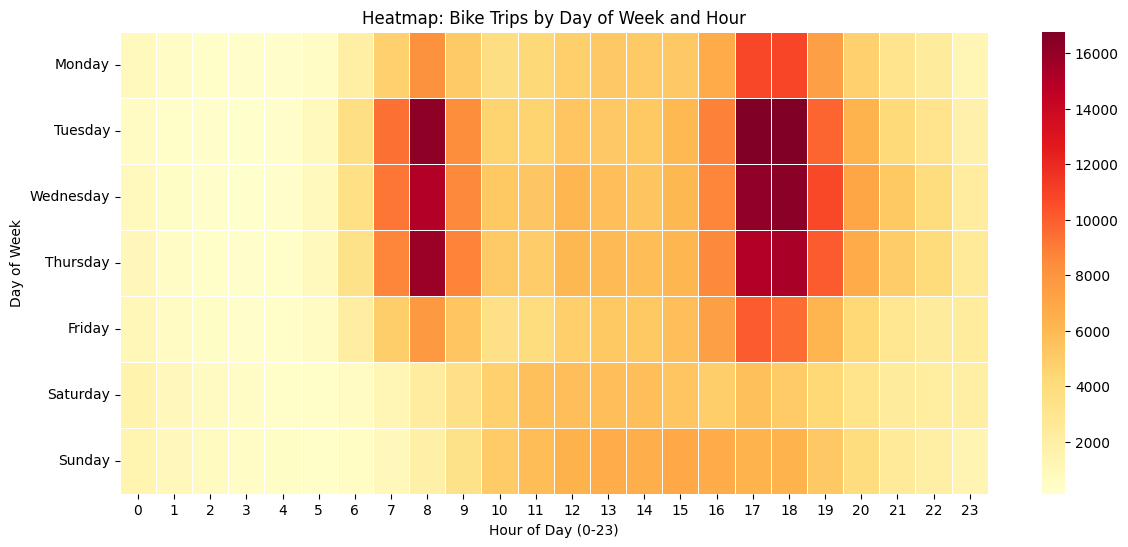

In [12]:
# Generate the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5)
plt.title('Heatmap: Bike Trips by Day of Week and Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Day of Week')
plt.show()